In [36]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.utils import multi_gpu_model
from keras import backend as K

import numpy
import os

# fix random seed for reproducibility 
seed = 7
numpy.random.seed(seed)


### Model Save Settings

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = './model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'mnist-' + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)


### Loading dataset

In [32]:
(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()
print(X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Data Preprocessing

In [33]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_validation = X_validation.reshape(X_validation.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_validation = np_utils.to_categorical(Y_validation, 10)
print(X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape)

num_classes = Y_train.shape[1]

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


### Build a model

In [38]:
# Create a model
input_x = Input(shape=(28, 28, 1))

layer_1 = Conv2D(32, (5, 5), padding='same', activation='relu')(input_x)

layer_2 = MaxPooling2D((2, 2), strides=(1, 1), padding='same')(layer_1)
layer_2 = Dropout(0.2)(layer_2)

dense_1 = Flatten()(layer_2)
dense_2 = Dense(128, activation='sigmoid')(dense_1)
output  = Dense(num_classes, activation='softmax')(dense_2)

# This creates a model that includes
# the Input layer and three Dense layers
cnn_model = Model(inputs=[input_x], outputs=output)

cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Model Training

In [40]:
history = cnn_model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=50, batch_size=200, verbose=1,
                    callbacks=[cb_checkpoint, cb_early_stopping])

print('\nAccuracy: {:.4f}'.format(cnn_model.evaluate(X_validation, Y_validation)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0056 - acc: 0.9993 - val_loss: 0.0331 - val_acc: 0.9890

Epoch 00001: val_loss did not improve from 0.03084
Epoch 2/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0049 - acc: 0.9993 - val_loss: 0.0316 - val_acc: 0.9899

Epoch 00002: val_loss did not improve from 0.03084
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0039 - acc: 0.9995 - val_loss: 0.0324 - val_acc: 0.9895

Epoch 00003: val_loss did not improve from 0.03084
Epoch 4/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.0340 - val_acc: 0.9895

Epoch 00004: val_loss did not improve from 0.03084
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0031 - acc: 0.9996 - val_loss: 0.0316 - val_acc: 0.9905

Epoch 00005: val_loss did not improve from 0.03084
Epoch

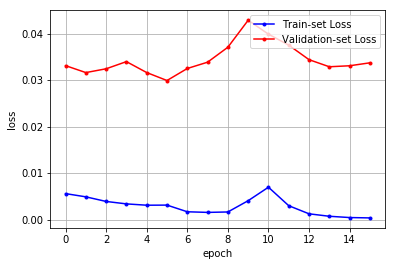

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()